In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

Datadir = 'C:/Users/mukun/Documents/GitHub/Car-Make-Predictor-CNN/archive'
All_images = os.listdir(Datadir)
image_size = 100
training_data = []

def create_dictionary(all_images_names):
    name_dict = {}
    index = 0

    for image in all_images_names:
        car_company = image.split("_")[0]

        if car_company not in name_dict:
            name_dict[car_company] = index
            index += 1
    return name_dict
car_dict = create_dictionary(All_images)

def create_training_data():
    for img in All_images:
        compnay_name = img.split("_")[0]
        class_name  = car_dict[compnay_name]
        try:
            img_array = cv2.imread(os.path.join(Datadir,img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (image_size, image_size))
            training_data.append([new_array,class_name])
        except Exception as e:
            pass
create_training_data()
print(len(training_data))

64467


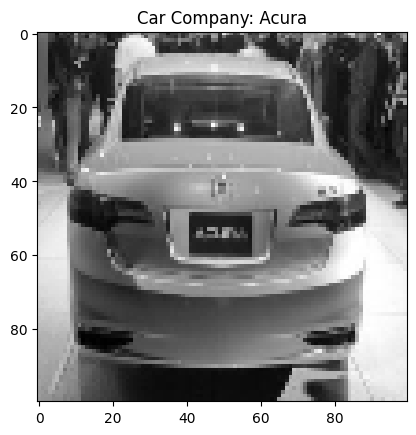

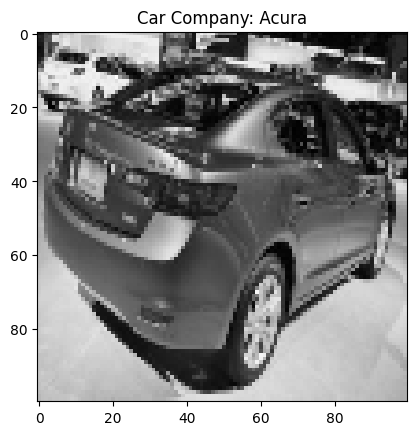

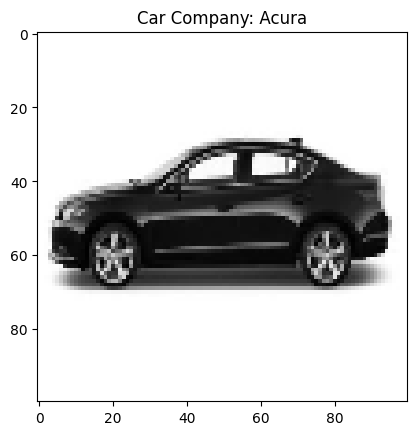

In [2]:
keys_list = list(car_dict.keys())
for features,labels in training_data[:3]:
    plt.imshow(features, cmap="gray")
    plt.title(f"Car Company: {keys_list[labels]}")
    plt.show()

In [3]:
import random 
random.shuffle(training_data)

X = []
y = []

for features, labels in training_data:
    X.append(features)
    y.append(labels)

X = np.array(X).reshape(-1, image_size, image_size, 1)
X = X / 255.0
y = np.array(y)

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D


#Input layer
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

#1st Layer
model.add(Conv2D(128, (3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

#2nd layer
model.add(Flatten())
model.add(Dense(128))

#Output layer
model.add(Dense(1))
model.add(Activation('softmax'))

model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])
model.fit(X, y, batch_size = 32, epochs = 5, validation_split = 0.2)





Epoch 1/5



C:\Users\mukun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)



1612/1612 [==============================] - 300s 185ms/step - loss: 0.0000e+00 - accuracy: 0.0045 - val_loss: 0.0000e+00 - val_accuracy: 0.0047
Epoch 2/5
1612/1612 [==============================] - 303s 188ms/step - loss: 0.0000e+00 - accuracy: 0.0045 - val_loss: 0.0000e+00 - val_accuracy: 0.0047
Epoch 3/5
1612/1612 [==============================] - 304s 188ms/step - loss: 0.0000e+00 - accuracy: 0.0045 - val_loss: 0.0000e+00 - val_accuracy: 0.0047
Epoch 4/5
1612/1612 [==============================] - 302s 187ms/step - loss: 0.0000e+00 - accuracy: 0.0045 - val_loss: 0.0000e+00 - val_accuracy: 0.0047
Epoch 5/5
1612/1612 [==============================] - 302s 187ms/step - loss: 0.0000e+00 - accuracy: 0.0045 - val_loss: 0.0000e+00 - val_accuracy: 0.0047
